## Fetch Data Analyst Take Home - Cara Lachenmayer


In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# First Explore the data
I'll start by reading in the csv files and doing some exploratory analysis to examine the data.  

In [4]:
# read in data sets
df_products = pd.read_csv('/content/drive/My Drive/Data Analyst Take Home/PRODUCTS_TAKEHOME.csv')
df_users = pd.read_csv('/content/drive/My Drive/Data Analyst Take Home/USER_TAKEHOME.csv')
df_transaction = pd.read_csv('/content/drive/My Drive/Data Analyst Take Home/TRANSACTION_TAKEHOME.csv')

In [5]:
# explore the top rows to see what the fields look like for each dataset and the sum of null values for each field - products
print("\n\nFields- products")
print(df_products.head())
print("\n\nInfo- products")
print(df_products.info())
print("\n\nNulls- products")
print(df_products.isnull().sum())



Fields- products
          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN                                  COLGATE-PALMOLIVE   
4        NaN  MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...   

             BRAND       BARCODE  
0              NaN  7.964944e+11  
1              NaN  2.327801e+10  
2         

In [14]:
# explore the top rows to see what the fields look like for each dataset and the sum of null values for each field - users
print("\n\nFields- users")
print(df_users.head())
print("\n\nInfo - users")
print(df_users.info())
print("\n\nNulls- users")
print(df_users.isnull().sum())



Fields- users
                         ID              CREATED_DATE  \
0  5ef3b4f17053ab141787697d 2020-06-24 20:17:54+00:00   
1  5ff220d383fcfc12622b96bc 2021-01-03 19:53:55+00:00   
2  6477950aa55bb77a0e27ee10 2023-05-31 18:42:18+00:00   
4  653cf5d6a225ea102b7ecdc2 2023-10-28 11:51:50+00:00   
5  5fe2b6f3ad416a1265c4ab68 2020-12-23 03:18:11+00:00   

                 BIRTH_DATE STATE LANGUAGE  GENDER   AGE  
0 2000-08-11 00:00:00+00:00    CA   es-419  female  25.0  
1 2001-09-24 04:00:00+00:00    PA       en  female  24.0  
2 1994-10-28 00:00:00+00:00    FL   es-419  female  31.0  
4 1972-03-19 00:00:00+00:00    PA       en  female  53.0  
5 1999-10-27 04:00:00+00:00    NY       en  female  26.0  


Info - users
<class 'pandas.core.frame.DataFrame'>
Index: 65190 entries, 0 to 99998
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   ID            65190 non-null  object             
 1  

In [7]:
# explore the top rows to see what the fields look like for each dataset and the sum of null values for each field - transactions
print("\n\nFields- transactions")
print(df_transaction.head())
print("\n\nInfo- transactions")
print(df_transaction.info())
print("\n\nNulls- transactions")
print(df_transaction.isnull().sum())



Fields- transactions
                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
2  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   

                   SCAN_DATE STORE_NAME                   USER_ID  \
0  2024-08-21 14:19:06.539 Z    WALMART  63b73a7f3d310dceeabd4758   
1  2024-07-20 09:50:24.206 Z       ALDI  62c08877baa38d1a1f6c211a   
2  2024-08-19 15:38:56.813 Z    WALMART  60842f207ac8b7729e472020   
3  2024-06-19 11:03:37.468 Z  FOOD LION  63fcd7cea4f8442c3386b589   
4  2024-07-05 15:56:43.549 Z   RANDALLS  6193231ae9b3d75037b0f928   

        BARCODE FINAL_QUANTITY FINAL_SALE  
0  1.530001e+10           1.00             
1           NaN           zero       1.49  
2  7.874223e+10           1.00             
3  7.833997e+11           zero       3.49  

# Exploratory Data Analysis Findings

*   Are there any data quality issues present?
  - Yes, after a quick look at the data there are a few things I am noticing.
  - For products, there are a significant amount of missing values.  
  - For users, there are also quite a bit of nulls for most of the fields. They will need to be adressed but since I don't have context I will likely remove them.
  - For transactions, Final Quantity and Final Sale have a mix of strings, empty strings and valid numbers. I'll likely convert these columns to the same data types. The only column with nulls here is barcode.


*   Are there any fields that are challenging to understand?
  - In the products dataset there is a field Manufacturer and there are plenty of "NaN"s and "Placeholder Manufacturer"s. I plan to exclude this from the brand analysis but would love further insight into the difference between the two and if they are in fact important.
  - As mentioned in the last question, in the transactions dataset final quality and final sale appear numeric but do contain strings. Is there a reason for this? Failed scans or manual entry? Without knowing I will convert "zero" to 0 manually.


# Data Cleaning

In the next seciton I am going to clean up the code a bit to address my findings above. Mainly standardizing columns and handling missing values.

In [8]:
# convert dates to datetime in users and transactions
df_transaction['PURCHASE_DATE'] = pd.to_datetime(df_transaction['PURCHASE_DATE'])
df_transaction['SCAN_DATE'] = pd.to_datetime(df_transaction['SCAN_DATE'])
df_users['CREATED_DATE'] = pd.to_datetime(df_users['CREATED_DATE'])
df_users['BIRTH_DATE'] = pd.to_datetime(df_users['BIRTH_DATE'])

In [26]:
# clean the Final Quantity and Final Sale to be consistent
df_transaction['FINAL_QUANTITY'] = (df_transaction['FINAL_QUANTITY'].astype(str).str.strip().replace('zero', 0).replace('', np.nan))
df_transaction['FINAL_QUANTITY'] = pd.to_numeric(df_transaction['FINAL_QUANTITY'])
df_transaction['FINAL_SALE'] = (df_transaction['FINAL_SALE'].astype(str).str.strip().replace('zero', 0).replace('', np.nan))
df_transaction['FINAL_SALE'] = pd.to_numeric(df_transaction['FINAL_SALE'])

In [21]:
# lets make the users birthdate usable by converting to an age
today = pd.to_datetime('today')
df_users['AGE'] = (today.year - df_users['BIRTH_DATE'].dt.year - ((today.month < df_users['BIRTH_DATE'].dt.month) |
       ((today.month == df_users['BIRTH_DATE'].dt.month) & (today.day < df_users['BIRTH_DATE'].dt.day)))
)

In [23]:
#test age
#print(df_users.head())

In [28]:
# example of nulls that can be removed dependent on context
# filter out placeholder manufacturer's for brand analysis
df_products = df_products[(df_products['BRAND'].notnull()) & (df_products['MANUFACTURER'] != 'PLACEHOLDER MANUFACTURER')]

In [27]:
# any rows that could have a critical nulls for example...
# users without a birthday
df_users = df_users[df_users['AGE'].notnull()]

# rows where there are no barcodes or brands
df_products = df_products[df_products['BRAND'].notnull() & df_products['BARCODE'].notnull()]

# transactions that are missing final sale or final quantity
df_transaction = df_transaction[df_transaction['FINAL_SALE'].notnull() & df_transaction['FINAL_QUANTITY'].notnull()]


## Visualizations.

Without knowing what exactly we're looking for or at I will now show a few basic graphs to identify different relationships that may exist in the data.

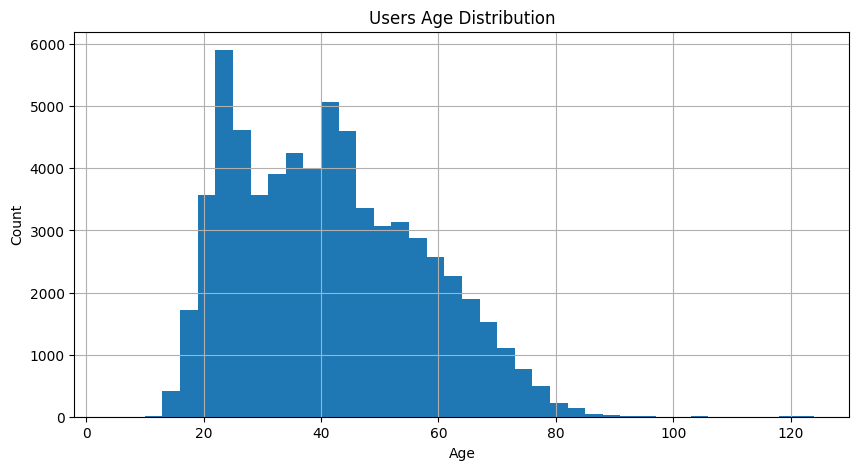

In [30]:
# age visualizations
plt.figure(figsize=(10,5))
df_users['AGE'].hist(bins=40)
plt.title('Users Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

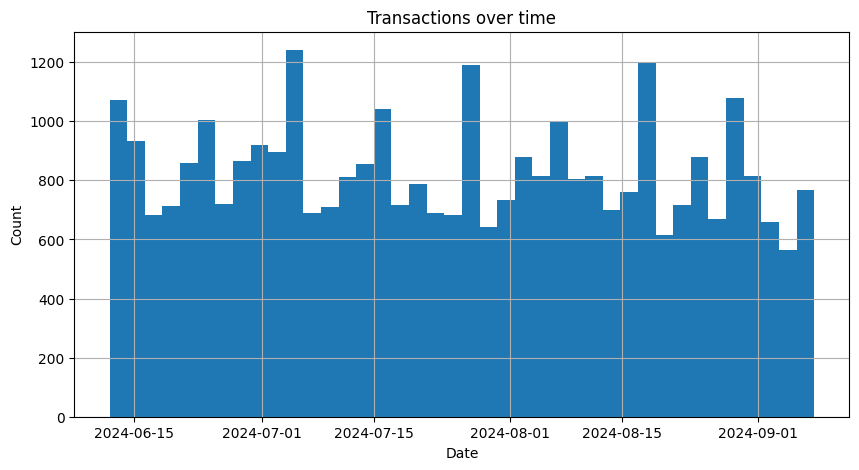

In [31]:
# Transactions over time
plt.figure(figsize=(10,5))
df_transaction['PURCHASE_DATE'].hist(bins=40)
plt.title('Transactions over time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

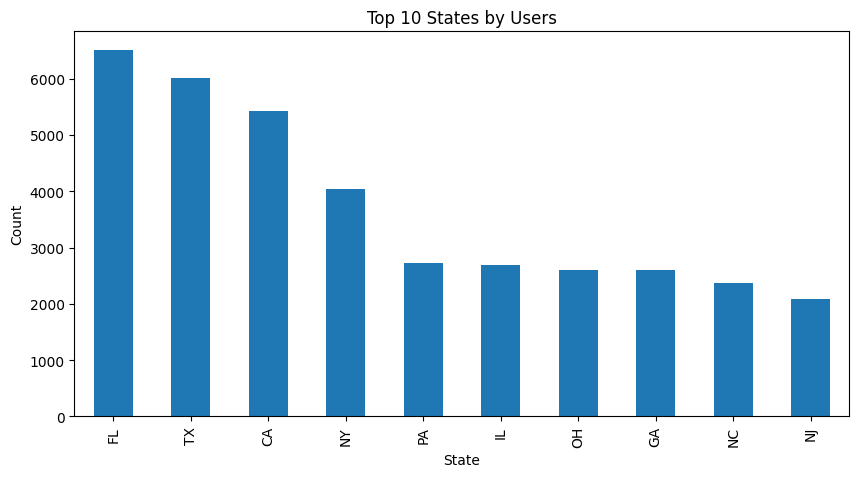

In [34]:
# top states by users
plt.figure(figsize=(10,5))
df_users['STATE'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 States by Users')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()